When we are trying to find a line that fits a set of data best, we are performing Linear Regression.

A line is determined by its slope and its intercept. In other words, for each point y on a line we can say:

y=mx+b

where m is the slope, and b is the intercept. y is a given point on the y-axis, and it corresponds to a given x on the x-axis.

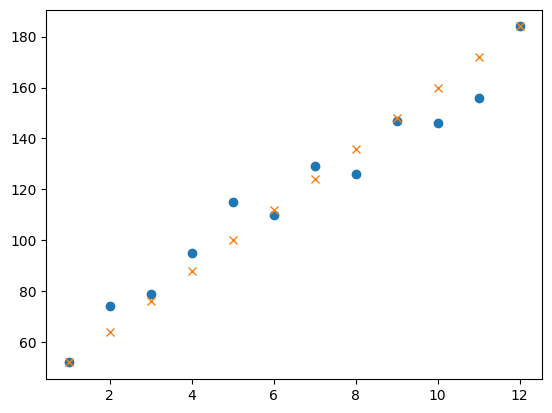

In [10]:
import matplotlib.pyplot as plt
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 12
#intercept:
b = 40

# calculating y
y = []
for month in months:
  y.append((month * m) + b)

plt.plot(months, revenue, "o")
plt.plot(months, y, "x")

plt.show()

## Loss

For each data point, we calculate loss, a number that measures how bad the model’s (in this case, the line’s) prediction was. You may have seen this being referred to as error.

We can think about loss as the squared distance from the point to the line. We do the squared distance (instead of just the distance) so that points above and below the line both contribute to total loss in the same way:

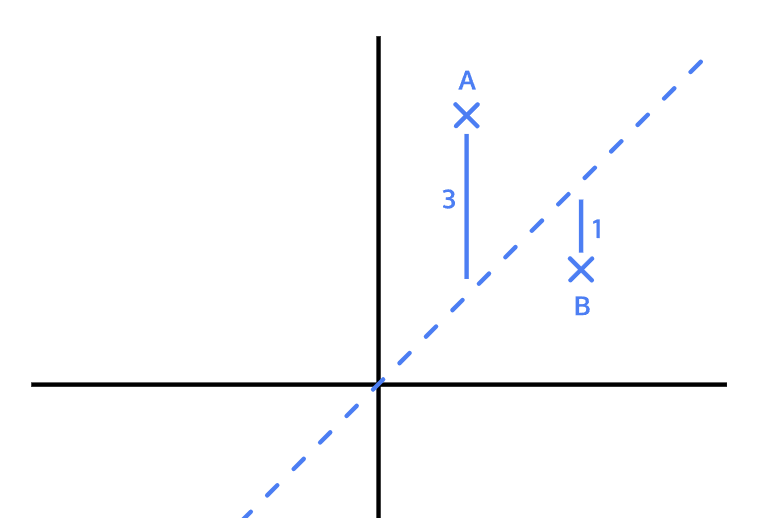

In this example:

For point A, the squared distance is 9 (3²)
For point B, the squared distance is 1 (1²)

The goal of a linear regression model is to find the slope and intercept pair that minimizes loss on average across all of the data.

## Gradient descent for slope

As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It’s like we are moving down a hill, and stop once we reach the bottom. The process by which we do this is called gradient descent. We move in the direction that decreases our loss the most. Gradient refers to the slope of the curve at any point.

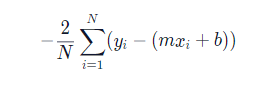

- N is the number of points you have in your dataset
- m is the current gradient guess
- b is the current intercept guess

To find the m gradient:
- we find the sum of x_value * (y_value - (m*x_value + b)) for all the y_values and x_values we have
- and then we multiply the sum by a factor of -2/N. N is the number of points we have.

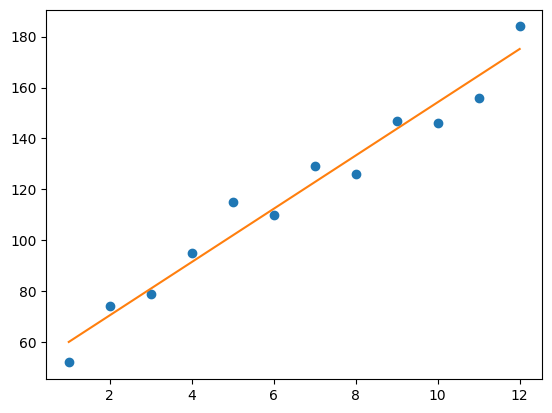

In [11]:
import matplotlib.pyplot as plt

def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
#Your gradient_descent function here:  
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for i in range(num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)
  return [b, m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

Congratulations! You’ve now built a linear regression algorithm from scratch.

Luckily, we don’t have to do this every time we want to use linear regression. We can use Python’s scikit-learn library. Scikit-learn, or sklearn, is used specifically for Machine Learning. Inside the linear_model module, there is a LinearRegression() function we can use:

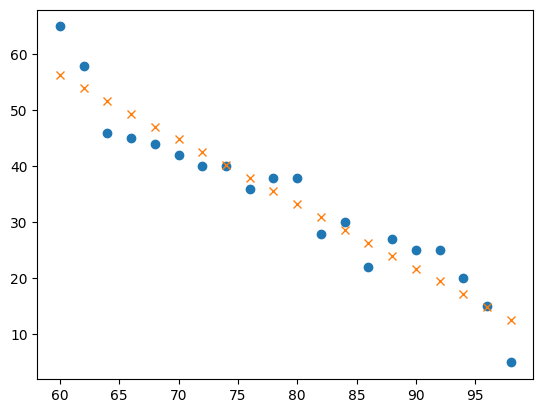

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')

# create a linear regression model
line_fitter = LinearRegression()

# fit it to my data
line_fitter.fit(temperature, sales)

# use predict functional to pass in x-values and receive the y-values that this line would predict
sales_predict = line_fitter.predict(temperature)

plt.plot(temperature, sales_predict, 'x')

plt.show()

- We can measure how well a line fits by measuring loss.
- The goal of linear regression is to minimize loss.
- To find the line of best fit, we try to find the b value (intercept) and the m value (slope) that minimize loss.
- Convergence refers to when the parameters stop changing with each iteration.
- Learning rate refers to how much the parameters are changed on each iteration.
- We can use Scikit-learn’s LinearRegression() model to perform linear regression on a set of points.

## Honey production project

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


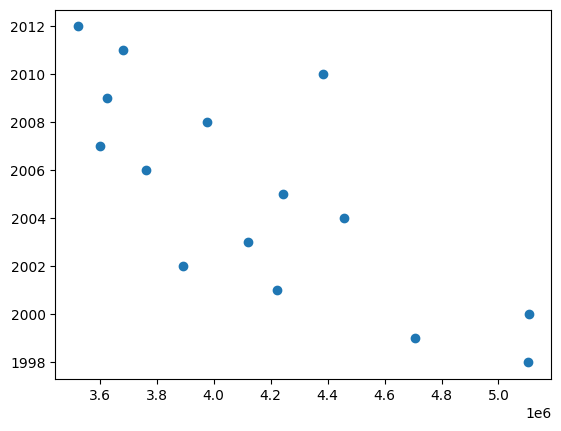

Slope of the line:  [-88303.18915238]
Intercept of the line:  181208083.10732976


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("honeyproduction.csv")

print(df.head())

# Group totalprod by year
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

X = prod_per_year['year']

X = X.values.reshape(-1,1)

y = prod_per_year['totalprod']

y = y.values.reshape(-1,1)

plt.scatter(y, X)
plt.show()

Slope of the line:  [-88303.18915238]
Intercept of the line:  181208083.10732976


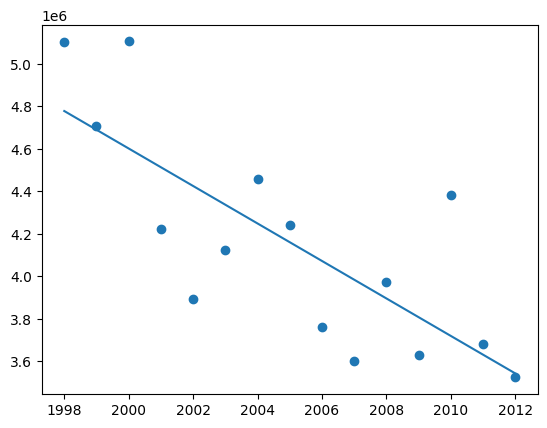

In [33]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
print("Slope of the line: ", regr.coef_[0])
print("Intercept of the line: ", regr.intercept_[0])

y_predict = regr.predict(X)

plt.plot(X, y_predict)
plt.scatter(X, y)
plt.show()

Predict what honey production will look like in 2050

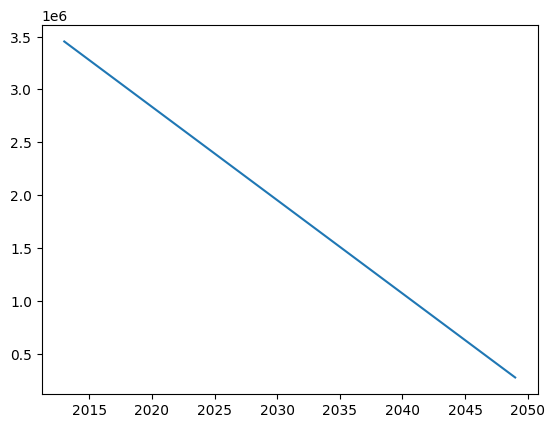

In [32]:
# Create array from 2013 to 2050
X_future = np.array(range(2013,2050))

X_future = X_future.reshape(-1,1)
# You can think of reshape() as rotating this array. 
# Rather than one big row of numbers, X_future is now a big column of numbers — there’s one number in each row.

future_predict = regr.predict(X_future)
plt.plot(X_future, future_predict)
plt.show()